In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_parquet('./data/combined data/data.parquet')

In [3]:
df

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
0,NORMAL,257,13,2023-04-30 23:54:00,S Bouquet Ave & Sennott St,2023-04-30 23:59:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
1,NORMAL,351,13,2023-04-30 10:21:00,S Bouquet Ave & Sennott St,2023-04-30 10:27:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
2,NORMAL,310,13,2023-04-30 03:59:00,S Bouquet Ave & Sennott St,2023-04-30 04:04:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
3,NORMAL,408,13,2023-04-30 00:44:00,S Bouquet Ave & Sennott St,2023-04-30 00:50:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
4,NORMAL,417,13,2023-04-29 09:19:00,S Bouquet Ave & Sennott St,2023-04-29 09:26:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387225,NORMAL,1886,43,2023-09-05 20:04:09,Eliza St & Lytle St,2023-09-05 20:35:35,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:31:26
387226,NORMAL,242,42,2024-04-29 15:39:00,Second Ave & Tecumseh St,2024-04-29 15:43:00,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:04:00
387227,NORMAL,646,42,2024-04-09 18:06:00,Second Ave & Tecumseh St,2024-04-09 18:16:00,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:10:00
387228,NORMAL,776,42,2024-01-26 11:40:26,Second Ave & Tecumseh St,2024-01-26 11:53:22,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:12:56


In [4]:
df.shape

(387230, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387230 entries, 0 to 387229
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   Closed Status               387230 non-null  object         
 1   Duration                    387230 non-null  int64          
 2   Start Station Id            387230 non-null  int64          
 3   Start Date                  387230 non-null  datetime64[ns] 
 4   Start Station Name          387230 non-null  object         
 5   End Date                    387230 non-null  datetime64[ns] 
 6   End Station Id              387230 non-null  int64          
 7   End Station Name            387230 non-null  object         
 8   Rider Type                  387230 non-null  object         
 9   Start Station Total Docks   387230 non-null  int64          
 10  Start Station Latitude      387230 non-null  float64        
 11  Start Station Longitude   

In [6]:
df['Closed Status'].unique()

array(['NORMAL', 'TERMINATED', 'None', 'FORCED_CLOSED', 'GRACE_PERIOD'],
      dtype=object)

In [7]:
df.isna().sum()

Closed Status                 0
Duration                      0
Start Station Id              0
Start Date                    0
Start Station Name            0
End Date                      0
End Station Id                0
End Station Name              0
Rider Type                    0
Start Station Total Docks     0
Start Station Latitude        0
Start Station Longitude       0
Start Station Neighborhood    0
End Station Total Docks       0
End Station Latitude          0
End Station Longitude         0
End Station Neighborhood      0
Trip Distance (km)            0
Trip Time                     0
dtype: int64

In [8]:
df['Closed Status'].value_counts()

NORMAL           356995
GRACE_PERIOD      23434
None               6097
FORCED_CLOSED       388
TERMINATED          316
Name: Closed Status, dtype: int64

In [9]:
df['Trip Distance (km)'].mean()

1.2540566039414038

In [10]:
df['Trip Distance (km)'].median()

0.8740520972080654

In [11]:
df

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
0,NORMAL,257,13,2023-04-30 23:54:00,S Bouquet Ave & Sennott St,2023-04-30 23:59:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
1,NORMAL,351,13,2023-04-30 10:21:00,S Bouquet Ave & Sennott St,2023-04-30 10:27:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
2,NORMAL,310,13,2023-04-30 03:59:00,S Bouquet Ave & Sennott St,2023-04-30 04:04:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:05:00
3,NORMAL,408,13,2023-04-30 00:44:00,S Bouquet Ave & Sennott St,2023-04-30 00:50:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:06:00
4,NORMAL,417,13,2023-04-29 09:19:00,S Bouquet Ave & Sennott St,2023-04-29 09:26:00,34,N Dithridge St & Centre Ave,MEMBER,23,40.441638,-79.955764,Central Oakland,19,40.451281,-79.952982,North Oakland,1.096491,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387225,NORMAL,1886,43,2023-09-05 20:04:09,Eliza St & Lytle St,2023-09-05 20:35:35,43,Eliza St & Lytle St,CASUAL,19,40.413481,-79.948254,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.000000,0 days 00:31:26
387226,NORMAL,242,42,2024-04-29 15:39:00,Second Ave & Tecumseh St,2024-04-29 15:43:00,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:04:00
387227,NORMAL,646,42,2024-04-09 18:06:00,Second Ave & Tecumseh St,2024-04-09 18:16:00,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:10:00
387228,NORMAL,776,42,2024-01-26 11:40:26,Second Ave & Tecumseh St,2024-01-26 11:53:22,43,Eliza St & Lytle St,MEMBER,19,40.408857,-79.943684,Hazelwood,19,40.413481,-79.948254,Hazelwood,0.643509,0 days 00:12:56


In [12]:
df['Start Station Name'].value_counts().head(10)

S Bouquet Ave & Sennott St                  34015
Boulevard of the Allies & Parkview Ave      26564
N Dithridge St & Centre Ave                 23071
Forbes Ave & Schenley Dr                    22565
O'Hara St and University Place              20526
Atwood St & Bates St                        16804
Zulema St & Coltart Ave                     15173
Allequippa St & Darragh St                  14335
S 27th St & Sidney St. (Southside Works)    13798
Fifth Ave & S Bouquet St                    13124
Name: Start Station Name, dtype: int64

In [13]:
df['Start Station Name'].value_counts().tail(10)

Tioga St & N Homewood Ave          513
Bedford Ave & Memory Ln            348
Hamilton Ave & Fifth Ave           271
Centre Ave & Heldman St            268
Rosetta St & N Aiken Ave           260
Eliza St & Lytle St                189
Second Ave & Tecumseh St           187
Wilkinsburg Park & Ride            149
N Braddock Ave & Frankstown Ave    129
N Braddock Ave & Hamilton Ave      108
Name: Start Station Name, dtype: int64

In [14]:
df['End Station Name'].value_counts().head(10)

S Bouquet Ave & Sennott St                  35398
Boulevard of the Allies & Parkview Ave      25358
Forbes Ave & Schenley Dr                    24259
O'Hara St and University Place              21355
N Dithridge St & Centre Ave                 20147
Zulema St & Coltart Ave                     16474
Atwood St & Bates St                        16241
S 27th St & Sidney St. (Southside Works)    15238
Fifth Ave & S Bouquet St                    12802
Schenley Dr & Schenley Dr Ext               10763
Name: End Station Name, dtype: int64

In [15]:
df['End Station Name'].value_counts().tail(10)

Tioga St & N Homewood Ave          599
Centre Ave & Heldman St            280
Hamilton Ave & Fifth Ave           268
Wilkinsburg Park & Ride            253
Second Ave & Tecumseh St           233
Bedford Ave & Memory Ln            205
Eliza St & Lytle St                176
Rosetta St & N Aiken Ave           174
N Braddock Ave & Frankstown Ave    146
N Braddock Ave & Hamilton Ave      123
Name: End Station Name, dtype: int64

In [16]:
df['Start Station Neighborhood'].value_counts()

Central Oakland          101248
North Oakland             81197
Downtown                  35531
Shadyside                 26388
South Side Flats          24422
Bloomfield                18535
Terrace Village           14335
Strip District            13603
West Oakland              13124
North Shore                8417
South Shore                7659
Lower Lawrenceville        7605
Friendship                 6963
Central Lawrenceville      5313
East Liberty               4759
Hazelwood                  3896
South Oakland              3359
Chateau                    3047
Allegheny Center           2990
Upper Lawrenceville        1219
Middle Hill                 916
Central Northside           658
Homewood South              621
Hill District               348
Larimer                     271
Crawford-Roberts            268
Garfield                    260
Wilkinsburg                 149
Homewood North              129
Name: Start Station Neighborhood, dtype: int64

In [17]:
df['End Station Neighborhood'].value_counts()

Central Oakland          102065
North Oakland             81295
Downtown                  35662
Shadyside                 27307
South Side Flats          26358
Bloomfield                17490
Strip District            14019
West Oakland              12802
Terrace Village            9266
North Shore                8786
Lower Lawrenceville        7704
South Shore                7631
Friendship                 7456
Central Lawrenceville      5704
East Liberty               4931
Hazelwood                  3912
South Oakland              3542
Chateau                    3325
Allegheny Center           3165
Upper Lawrenceville        1362
Homewood South              722
Central Northside           703
Middle Hill                 697
Crawford-Roberts            280
Larimer                     268
Wilkinsburg                 253
Hill District               205
Garfield                    174
Homewood North              146
Name: End Station Neighborhood, dtype: int64

In [18]:
set(df['Start Station Neighborhood'].unique().tolist()).intersection(set(df['End Station Neighborhood'].unique().tolist()))

{'Allegheny Center',
 'Bloomfield',
 'Central Lawrenceville',
 'Central Northside',
 'Central Oakland',
 'Chateau',
 'Crawford-Roberts',
 'Downtown',
 'East Liberty',
 'Friendship',
 'Garfield',
 'Hazelwood',
 'Hill District',
 'Homewood North',
 'Homewood South',
 'Larimer',
 'Lower Lawrenceville',
 'Middle Hill',
 'North Oakland',
 'North Shore',
 'Shadyside',
 'South Oakland',
 'South Shore',
 'South Side Flats',
 'Strip District',
 'Terrace Village',
 'Upper Lawrenceville',
 'West Oakland',
 'Wilkinsburg'}

## Total trips to or through the strip district

#### starting or ending in the strip

In [19]:
df[(df['Start Date'].dt.year.isin([2023])) & ((df['Start Station Neighborhood']=='Strip District') | (df['End Station Neighborhood']=='Strip District'))]

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
16371,NORMAL,1039,4,2023-12-23 18:12:13,Burns White Center at 3 Crossings,2023-12-23 18:29:32,34,N Dithridge St & Centre Ave,MEMBER,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:17:19
16372,NORMAL,850,4,2023-12-17 14:18:02,Burns White Center at 3 Crossings,2023-12-17 14:32:12,34,N Dithridge St & Centre Ave,MEMBER,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:14:10
16373,NORMAL,857,4,2023-02-16 15:03:51,Burns White Center at 3 Crossings,2023-02-16 15:18:08,34,N Dithridge St & Centre Ave,CASUAL,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:14:17
16377,NORMAL,916,4,2023-03-23 12:50:47,Burns White Center at 3 Crossings,2023-03-23 13:06:03,34,N Dithridge St & Centre Ave,CASUAL,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:15:16
16378,NORMAL,894,4,2023-03-02 14:54:28,Burns White Center at 3 Crossings,2023-03-02 15:09:22,34,N Dithridge St & Centre Ave,CASUAL,15,40.456400,-79.980000,Strip District,19,40.451281,-79.952982,North Oakland,2.361265,0 days 00:14:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386859,NORMAL,1106,47,2023-11-12 20:04:27,17th St & Penn Ave,2023-11-12 20:22:53,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:18:26
386860,NORMAL,902,47,2023-10-05 16:47:48,17th St & Penn Ave,2023-10-05 17:02:50,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:15:02
386861,NORMAL,1024,47,2023-10-04 17:46:37,17th St & Penn Ave,2023-10-04 18:03:41,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:17:04
386862,NORMAL,1092,47,2023-09-27 17:53:39,17th St & Penn Ave,2023-09-27 18:11:51,56,Rosetta St & N Aiken Ave,MEMBER,19,40.449626,-79.985918,Strip District,15,40.467018,-79.935232,Garfield,4.713031,0 days 00:18:12


In [20]:
df[(df['Start Date'].dt.year==2024) & (df['Start Date'].dt.month==4)]['Start Date'].dt.day.max()

30

In [21]:
strip_district_data = df[((df['Start Station Neighborhood'] == 'Strip District') | (df['End Station Neighborhood'] == 'Strip District'))& 
                         (df['Start Date'].dt.year.isin([2023, 2024]))]

In [22]:
grouped_data = strip_district_data.groupby(strip_district_data['Start Date'].dt.date).size()

In [23]:
grouped_data.index = pd.to_datetime(grouped_data.index)

In [24]:
cumulative_rides_2023 = grouped_data[grouped_data.index.year == 2023].cumsum()
cumulative_rides_2024 = grouped_data[grouped_data.index.year == 2024].cumsum()

In [25]:
monthFmt = mdates.DateFormatter('%b')

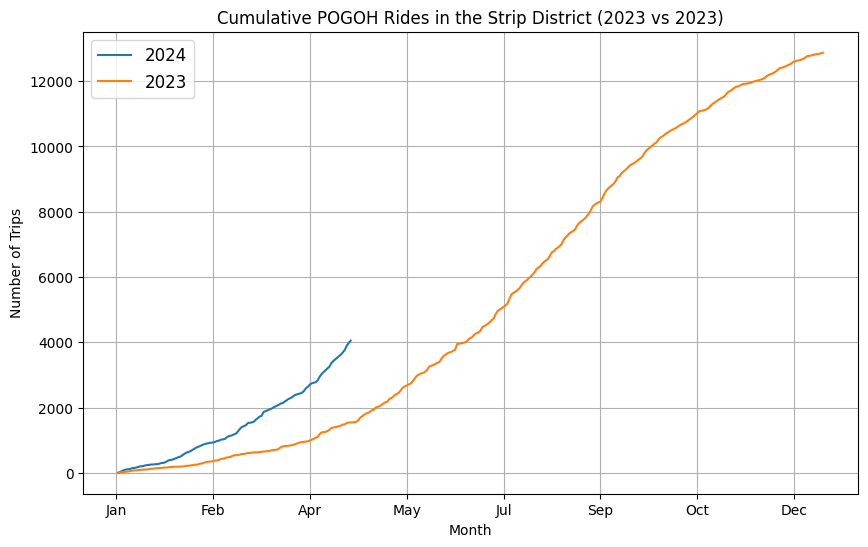

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rides_2024.index.dayofyear, cumulative_rides_2024, label='2024')
plt.plot(cumulative_rides_2023.index.dayofyear, cumulative_rides_2023, label='2023')
plt.legend(fontsize='large')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.title("Cumulative POGOH Rides in the Strip District (2023 vs 2023)")
plt.gca().xaxis.set_major_formatter(monthFmt)

In [27]:
total_rides_2022 = df[df['Start Date'].dt.year==2022].groupby(df['Start Date'].dt.month).size()
total_rides_2023 = df[df['Start Date'].dt.year==2023].groupby(df['Start Date'].dt.month).size()
total_rides_2024 = df[df['Start Date'].dt.year==2024].groupby(df['Start Date'].dt.month).size()

Text(8, 23000, 'City joins POGOH\npartnership program')

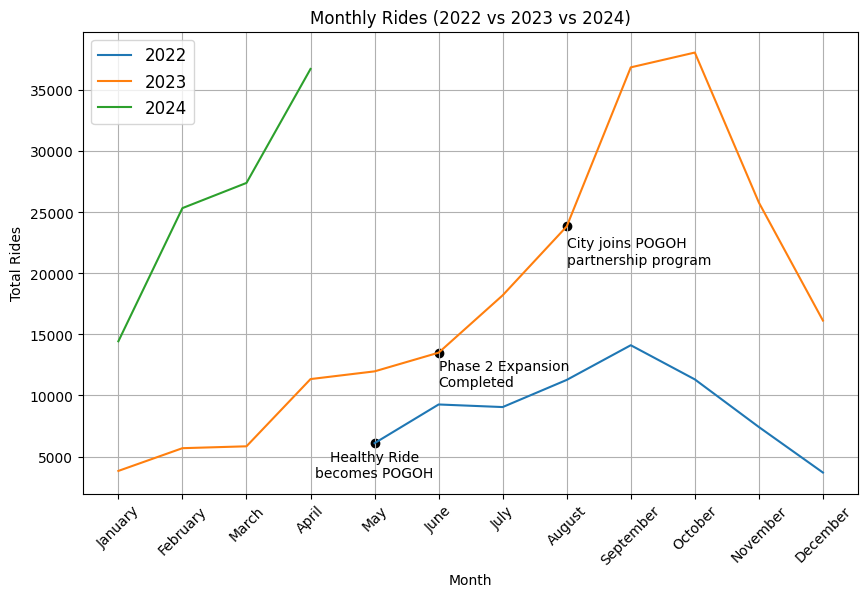

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(total_rides_2022.index, total_rides_2022, label='2022')
plt.plot(total_rides_2023.index, total_rides_2023, label='2023')
plt.plot(total_rides_2024.index, total_rides_2024, label='2024')
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(np.arange(1, len(month_names)+1), month_names, rotation=45)
plt.legend(fontsize='large', loc='upper left')
plt.grid(True)
plt.title("Monthly Rides (2022 vs 2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Total Rides")

plt.scatter(5,6097, color='black')
plt.text(5,5500,'Healthy Ride\nbecomes POGOH', ha='center', va='top')

plt.scatter(6,13505, color='black')
plt.text(6,13000,'Phase 2 Expansion\nCompleted', ha='left', va='top')

plt.scatter(8,23841, color='black')
plt.text(8,23000,'City joins POGOH\npartnership program', ha='left', va='top')

In [70]:
df[(df['Start Date'].dt.year==2023) & (df['Start Date'].dt.month==8)].shape


(23841, 19)

In [29]:
total_strip_rides_2022 = df[(df['Start Date'].dt.year==2022) & ((df['Start Station Neighborhood']=='Strip District') | (df['End Station Neighborhood']=='Strip District'))].groupby(df['Start Date'].dt.month).size()
total_strip_rides_2023 = df[(df['Start Date'].dt.year==2023) & ((df['Start Station Neighborhood']=='Strip District') | (df['End Station Neighborhood']=='Strip District'))].groupby(df['Start Date'].dt.month).size()
total_strip_rides_2024 = df[(df['Start Date'].dt.year==2024) & ((df['Start Station Neighborhood']=='Strip District') | (df['End Station Neighborhood']=='Strip District'))].groupby(df['Start Date'].dt.month).size()

Text(5, 750, 'Healthy ride becomes POGOH')

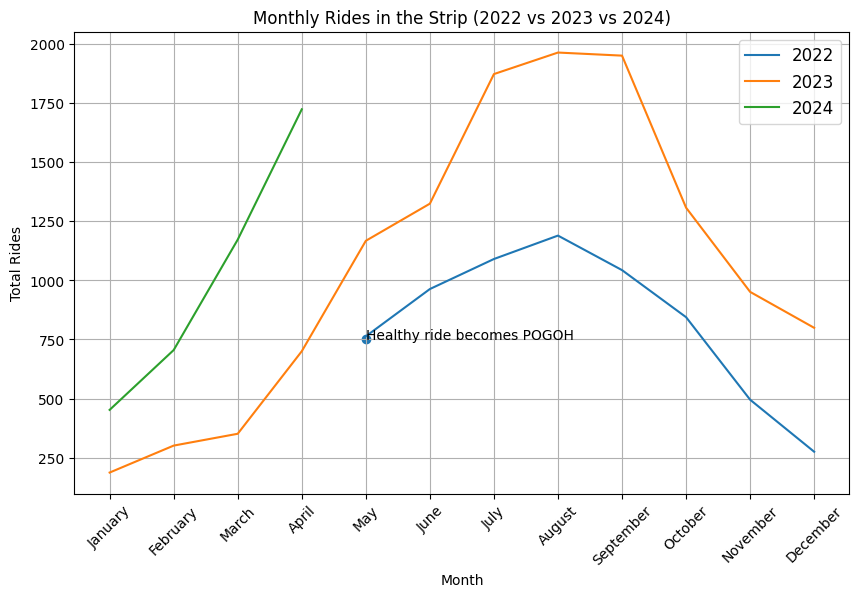

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(total_strip_rides_2022.index, total_strip_rides_2022, label='2022')
plt.plot(total_strip_rides_2023.index, total_strip_rides_2023, label='2023')
plt.plot(total_strip_rides_2024.index, total_strip_rides_2024, label='2024')
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(np.arange(1, len(month_names)+1), month_names, rotation=45)
plt.legend(fontsize='large')
plt.grid(True)
plt.title("Monthly Rides in the Strip (2022 vs 2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Total Rides")

plt.scatter(5,750)
plt.text(5,750,'Healthy ride becomes POGOH')

#### trips that almost certaintly went through the strip

In [31]:
set1 = ['Downtown', 'North Shore', 'Allegheny Center', 'Chateau', 'Central Northside', 'South Shore']
set2 = ['Lower Lawrenceville', 'Central Lawrenceville', 'Upper Lawrenceville', 'Bloomfield', 'Garfield', 'Shadyside', 'Friendship', 'East Liberty', 'Larimer']

In [32]:
df[((df['Start Date'].dt.year.isin([2023])) & (df['Start Station Neighborhood'].isin(set1)) & (df['End Station Neighborhood'].isin(set2))) |   ((df['Start Date'].dt.year.isin([2023])) & (df['Start Station Neighborhood'].isin(set2)) & (df['End Station Neighborhood'].isin(set1)))]

,Closed Status,Duration,Start Station Id,Start Date,Start Station Name,End Date,End Station Id,End Station Name,Rider Type,Start Station Total Docks,Start Station Latitude,Start Station Longitude,Start Station Neighborhood,End Station Total Docks,End Station Latitude,End Station Longitude,End Station Neighborhood,Trip Distance (km),Trip Time
162200,NORMAL,3502,6,2023-08-19 17:33:22,10th St & Penn Ave,2023-08-19 18:31:44,15,Ivy St & Walnut St,CASUAL,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:58:22
162201,NORMAL,3534,6,2023-08-19 17:32:42,10th St & Penn Ave,2023-08-19 18:31:36,15,Ivy St & Walnut St,MEMBER,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:58:54
162202,NORMAL,1294,6,2023-08-13 04:39:29,10th St & Penn Ave,2023-08-13 05:01:03,15,Ivy St & Walnut St,CASUAL,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:21:34
162203,NORMAL,1339,6,2023-12-02 13:28:00,10th St & Penn Ave,2023-12-02 13:50:19,15,Ivy St & Walnut St,MEMBER,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:22:19
162206,NORMAL,2238,6,2023-07-20 18:02:57,10th St & Penn Ave,2023-07-20 18:40:15,15,Ivy St & Walnut St,CASUAL,15,40.444653,-79.996074,Downtown,15,40.451781,-79.932253,Shadyside,5.471671,0 days 00:37:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386844,NORMAL,1641,40,2023-08-19 14:22:53,7th St & Penn Ave,2023-08-19 14:50:14,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:27:21
386845,NORMAL,1616,40,2023-10-10 17:50:15,7th St & Penn Ave,2023-10-10 18:17:11,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:26:56
386846,NORMAL,1111,40,2023-10-09 17:38:32,7th St & Penn Ave,2023-10-09 17:57:03,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:18:31
386847,NORMAL,1366,40,2023-09-20 17:43:36,7th St & Penn Ave,2023-09-20 18:06:22,56,Rosetta St & N Aiken Ave,MEMBER,19,40.443419,-80.000311,Downtown,15,40.467018,-79.935232,Garfield,6.110652,0 days 00:22:46


#### where do trips starting in the hill district go?

In [33]:
hill_neighborhoods = ['Middle Hill', 'Crawford-Roberts']

In [34]:
df[df['Start Station Neighborhood'].isin(hill_neighborhoods)]['End Station Neighborhood'].value_counts()

Downtown                 358
South Side Flats         135
Middle Hill              122
North Oakland             82
Crawford-Roberts          76
Strip District            63
Hill District             47
Central Oakland           46
Shadyside                 42
Terrace Village           40
Allegheny Center          30
Bloomfield                23
Lower Lawrenceville       23
South Shore               23
East Liberty              21
West Oakland              18
Chateau                    8
North Shore                8
Friendship                 7
Central Northside          5
Central Lawrenceville      4
South Oakland              2
Upper Lawrenceville        1
Name: End Station Neighborhood, dtype: int64